<a href="https://colab.research.google.com/github/mandy1057/udacity_cnn/blob/master/PYtorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 770.7MB 20kB/s 
ERROR: fastai 1.0.52 requires torchvision, which is not installed.


In [0]:
import torch 

In [0]:
!pip3 install https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 2.6MB 572kB/s 


In [0]:
import torch
import torchvision

In [0]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [0]:
data_transform = transforms.ToTensor()

In [0]:
train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

  0%|          | 49152/26421880 [00:00<01:01, 431181.93it/s]

26427392it [00:00, 73647513.58it/s]                            


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 355835.45it/s]
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 25705183.80it/s]                           
8192it [00:00, 162771.39it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
test_data = FashionMNIST(root='./data', train=False,
                                  download=True, transform=data_transform)


In [0]:
print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data))

Train data, number of images:  60000
Test data, number of images:  10000


In [0]:
# prepare data loaders, set the batch_size
## TODO: you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss

batch_size = 25

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loder  = DataLoader(test_data,batch_size=batch_size,shuffle=True)


# specify the image classes

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
'''fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(1, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])'''

"fig = plt.figure(figsize=(25, 4))\nfor idx in np.arange(batch_size):\n    ax = fig.add_subplot(1, batch_size/2, idx+1, xticks=[], yticks=[])\n    ax.imshow(np.squeeze(images[idx]), cmap='gray')\n    ax.set_title(classes[labels[idx]])"

In [0]:
import torch.nn as nn
import torch.nn.functional as F


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        ## output size = (W-F)/S +1 = (28-3)/1 +1 = 26
        # the output Tensor for one image, will have the dimensions: (10, 26, 26)
        # after one pool layer, this becomes (10, 13, 13)
        self.conv1 = nn.Conv2d(1,10,3)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool =  nn.MaxPool2d(2,2)
        
        # second conv layer: 10 inputs, 20 outputs, 3x3 conv
        ## output size = (W-F)/S +1 = (13-3)/1 +1 = 11
        # the output tensor will have dimensions: (20, 11, 11)
        # after another pool layer this becomes (20, 5, 5); 5.5 is rounded down
        
        self.conv2 = nn.Conv2d(10,20,3)
        
        # 20 outputs * the 5*5 filtered/pooled map size
        # 10 output channels (for the 10 classes)
        self.fc1 = nn.Linear(20*5*5,10)
        
     
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(x.size(0),-1)
        
        x = self.fc1(x)
        
        x = F.log_softmax(x, dim=1)
        
        return x
    
net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim

## TODO: specify loss function 
# cross entropy loss combines softmax and nn.NLLLoss() in one single class.
criterion = nn.NLLLoss()

## TODO: specify optimizer 
# stochastic gradient descent with a small learning rate
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [0]:
# Calculate accuracy before training
correct = 0
total = 0

# Iterate through test dataset
for images, labels in test_loder:

    # forward pass to get outputs
    # the outputs are a series of class scores
    outputs = net(images)

    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)

    # count up total number of correct labels
    # for which the predicted and true labels are equal
    total += labels.size(0)
    correct += (predicted == labels).sum()

# calculate the accuracy
# to convert `correct` from a Tensor into a scalar, use .item()
accuracy = 100.0 * correct.item() / total

# print it out!
print('Accuracy before training: ', accuracy)

Accuracy before training:  6.5


In [0]:
def train(n_epochs):
    
    loss_over_time = [] # to track the loss as the network trains
    
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0
        
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            inputs, labels = data

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(inputs)

            # calculate the loss
            loss = criterion(outputs, labels)

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to running_loss, we use .item()
            running_loss += loss.item()
            
            if batch_i % 1000 == 999:    # print every 1000 batches
                avg_loss = running_loss/1000
                # record and print the avg loss over the 1000 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

    print('Finished Training')
    return loss_over_time


In [0]:
# define the number of epochs to train for
n_epochs = 30 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 1000, Avg. Loss: 1.2229373131096364
Epoch: 1, Batch: 2000, Avg. Loss: 0.7003404630422592
Epoch: 2, Batch: 1000, Avg. Loss: 0.5579781339168549
Epoch: 2, Batch: 2000, Avg. Loss: 0.5160982782915234
Epoch: 3, Batch: 1000, Avg. Loss: 0.4755638301372528
Epoch: 3, Batch: 2000, Avg. Loss: 0.4616116755716503
Epoch: 4, Batch: 1000, Avg. Loss: 0.43611228694021703
Epoch: 4, Batch: 2000, Avg. Loss: 0.4260466439574957
Epoch: 5, Batch: 1000, Avg. Loss: 0.40994522524625066
Epoch: 5, Batch: 2000, Avg. Loss: 0.4153839112892747
Epoch: 6, Batch: 1000, Avg. Loss: 0.40008392438292506
Epoch: 6, Batch: 2000, Avg. Loss: 0.39094691520929337
Epoch: 7, Batch: 1000, Avg. Loss: 0.38472760765999553
Epoch: 7, Batch: 2000, Avg. Loss: 0.3825201311856508
Epoch: 8, Batch: 1000, Avg. Loss: 0.3765629167109728
Epoch: 8, Batch: 2000, Avg. Loss: 0.3691403240710497
Epoch: 9, Batch: 1000, Avg. Loss: 0.36465772999450563
Epoch: 9, Batch: 2000, Avg. Loss: 0.3636920418534428
Epoch: 10, Batch: 1000, Avg. Loss: 0.361

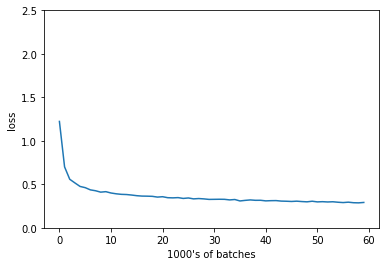

In [0]:
# visualize the loss as the network trained
plt.plot(training_loss)
plt.xlabel('1000\'s of batches')
plt.ylabel('loss')
plt.ylim(0, 2.5) # consistent scale
plt.show()

In [0]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loder):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(batch_size):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.335826

Test Accuracy of T-shirt/top: 89% (898/1000)
Test Accuracy of Trouser: 97% (971/1000)
Test Accuracy of Pullover: 82% (821/1000)
Test Accuracy of Dress: 89% (890/1000)
Test Accuracy of  Coat: 86% (868/1000)
Test Accuracy of Sandal: 96% (960/1000)
Test Accuracy of Shirt: 51% (519/1000)
Test Accuracy of Sneaker: 96% (962/1000)
Test Accuracy of   Bag: 97% (975/1000)
Test Accuracy of Ankle boot: 95% (950/1000)

Test Accuracy (Overall): 88% (8814/10000)


ValueError: ignored

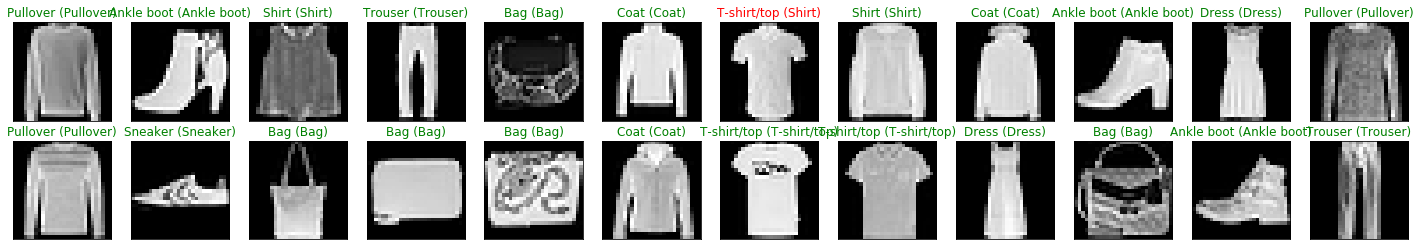

In [0]:
# obtain one batch of test images
dataiter = iter(test_loder)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))